```python
output = relu(dot(w,input)+b)
```
`w`和`b`都是张量，成为该层的权重（weight）或可训练参数 。`b`是bias
一开始随机初始化，下一步根据反馈信号组件调节这些权重。这个过程就是机器学习中的`学习`或`训练`

![img](images/002-004.png)
## SGD

![img](images/002-005.png)

> 使用动量方法可以避免这样的问题，这一方法的灵感来源于物理学。将优化过程想象成一个小球从损失函数曲线上滚下来。如果小球的动量足够大，那么它不会卡在峡谷里，最终会到达全局最小点。动量方法的实现过程是每一步都移动小球，不仅要考虑当前的斜率值（当前的加速度），还要考虑当前的速度（来自于之前的加速度）。这在实践中的是指，更新参数w不仅要考虑当前的梯度值，还要考虑上一次的参数更新,代码实现如下：


```python
past_velocity = 0
momentum = 0.1
while loss > 0.01:
  w,loss,gradient = get_current_paramenters()
  velocity = past_velocity * velocity - learning_rate * gradient
  past_velocity = velocity
  update_parameter(w)
```

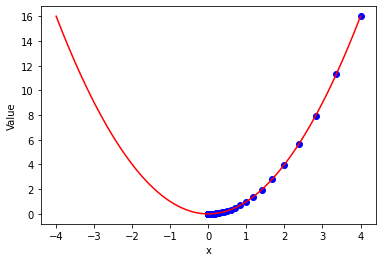

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def fn(x):
  fn = x ** 2
  return fn

# 用差分法近似求导
def derivate(x):
  h = 0.01
  derivate = (fn(x+h)-fn(x-h))/(2*h)
  return derivate

# 学习速率，可以调整看一下效果
eta = 0.08
num_iterate = 1000

# 样本起始计算量
x = 4
x_value = [x]
fn_value = [fn(x)]

for i in range(num_iterate):
  x -= eta * (derivate(x))
  x_value.append(x)
  fn_value.append(fn(x))


# 进行画图
y = np.max(np.abs(x_value))
z = np.linspace(-y,y,num_iterate)

plt.plot(x_value,fn_value,"bo")
plt.plot(z,fn(z),"r")
plt.xlabel("x")
plt.ylabel("Value")
plt.show()